# Exploratory Data Analysis (EDA) Report: Pharmaceutical Sales Data

## 1. Objective:
The primary goal of this analysis is to understand the patterns in pharmaceutical sales data, identify key revenue contributors, and evaluate sales performance across different regions and product categories. Insights from this analysis can guide business strategies for marketing, inventory planning, and revenue optimization.

## 2. Data Cleaning & Preprocessing:
This section covers the steps taken to ensure the dataset is clean, consistent, and ready for analysis. It includes handling missing values, checking data types, and filtering irrelevant records.t

### 2.1 Importing Libraries and Dataset
Essential Python libraries such as pandas, numpy, matplotlib, and seaborn were imported. The pharmaceutical sales dataset was loaded into a pandas DataFrame for preprocessing and analysis. Initial inspection was conducted to understand the structure, data types, and size of the dataset.

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [190]:
df = pd.read_excel(r'C:\Users\ank30\OneDrive\Projects\Pharma sales analysis\Pharma_data_analysis.xlsx')

In [191]:
df.head()

,Distributor,Customer Name,City,Country,Latitude,Longitude,Channel,Sub-channel,Product Name,Product Class,Quantity,Price,Sales,Month,Year,Name of Sales Rep,Manager,Sales Team
0,Gottlieb-Cruickshank,"Zieme, Doyle and Kunze",Lublin,Poland,51.2333,22.5667,Hospital,Private,Topipizole,Mood Stabilizers,4.0,368,1472.0,January,2018,Mary Gerrard,Britanny Bold,Delta
1,Gottlieb-Cruickshank,Feest PLC,Åšwiecie,Poland,53.4167,18.4333,Pharmacy,Retail,Choriotrisin,Antibiotics,7.0,591,4137.0,January,2018,Jessica Smith,Britanny Bold,Delta
2,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,50.0833,18.5000,Pharmacy,Institution,Acantaine,Antibiotics,30.0,66,1980.0,January,2018,Steve Pepple,Tracy Banks,Bravo
3,Gottlieb-Cruickshank,Barton Ltd Pharma Plc,CzeladÅº,Poland,50.3333,19.0833,Hospital,Private,Lioletine Refliruvax,Analgesics,6.0,435,2610.0,January,2018,Mary Gerrard,Britanny Bold,Delta
4,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,53.7800,20.4942,Pharmacy,Retail,Oxymotroban Fexoformin,Analgesics,20.0,458,9160.0,January,2018,Anne Wu,Britanny Bold,Delta


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254082 entries, 0 to 254081
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Distributor        254082 non-null  object 
 1   Customer Name      254082 non-null  object 
 2   City               254082 non-null  object 
 3   Country            254082 non-null  object 
 4   Latitude           254082 non-null  float64
 5   Longitude          254082 non-null  float64
 6   Channel            254082 non-null  object 
 7   Sub-channel        254082 non-null  object 
 8   Product Name       254082 non-null  object 
 9   Product Class      254082 non-null  object 
 10  Quantity           254082 non-null  float64
 11  Price              254082 non-null  int64  
 12  Sales              254082 non-null  float64
 13  Month              254082 non-null  object 
 14  Year               254082 non-null  int64  
 15  Name of Sales Rep  254082 non-null  object 
 16  Ma

In [193]:
df.describe()

,Latitude,Longitude,Quantity,Price,Sales,Year
count,254082.000000,254082.000000,254082.000000,254082.000000,2.540820e+05,254082.000000
mean,50.962222,10.803212,112.872139,412.207720,4.643772e+04,2018.385187
std,1.625526,4.143311,744.310385,224.963687,3.491918e+05,1.041352
min,47.514200,6.083800,-7200.000000,22.000000,-4.161600e+06,2017.000000
25%,49.805600,7.891100,5.000000,195.000000,1.704000e+03,2018.000000
50%,51.133300,9.397800,20.000000,430.000000,5.850000e+03,2018.000000
75%,52.083300,12.133300,50.000000,605.000000,2.156525e+04,2019.000000
max,54.781900,23.566700,117600.000000,794.000000,7.420560e+07,2020.000000


### 2.2 Handling Missing Values and Duplicates
The dataset was checked for missing values. Minor missing values can be imputed using statistical methods such as mean or median imputation, while columns with excessive missing data that could not be reliably filled could be dropped to maintain the integrity of the dataset.

In [195]:
df = df.drop(['Latitude', 'Longitude'], axis=1)

In [196]:
df['Date'] = pd.to_datetime((df['Month']+ '' + df['Year'].astype('str')), format='%B%Y')

In [197]:
df.isnull().sum()

Distributor          0
Customer Name        0
City                 0
Country              0
Channel              0
Sub-channel          0
Product Name         0
Product Class        0
Quantity             0
Price                0
Sales                0
Month                0
Year                 0
Name of Sales Rep    0
Manager              0
Sales Team           0
Date                 0
dtype: int64

In [198]:
df.duplicated().sum()

4

In [199]:
df.drop_duplicates()

,Distributor,Customer Name,City,Country,Channel,Sub-channel,Product Name,Product Class,Quantity,Price,Sales,Month,Year,Name of Sales Rep,Manager,Sales Team,Date
0,Gottlieb-Cruickshank,"Zieme, Doyle and Kunze",Lublin,Poland,Hospital,Private,Topipizole,Mood Stabilizers,4.0,368,1472.0,January,2018,Mary Gerrard,Britanny Bold,Delta,2018-01-01
1,Gottlieb-Cruickshank,Feest PLC,Åšwiecie,Poland,Pharmacy,Retail,Choriotrisin,Antibiotics,7.0,591,4137.0,January,2018,Jessica Smith,Britanny Bold,Delta,2018-01-01
2,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,Pharmacy,Institution,Acantaine,Antibiotics,30.0,66,1980.0,January,2018,Steve Pepple,Tracy Banks,Bravo,2018-01-01
3,Gottlieb-Cruickshank,Barton Ltd Pharma Plc,CzeladÅº,Poland,Hospital,Private,Lioletine Refliruvax,Analgesics,6.0,435,2610.0,January,2018,Mary Gerrard,Britanny Bold,Delta,2018-01-01
4,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,Pharmacy,Retail,Oxymotroban Fexoformin,Analgesics,20.0,458,9160.0,January,2018,Anne Wu,Britanny Bold,Delta,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254077,Bashirian-Kassulke,"Koch, Borer and Hagenes Pharmaceutical Ltd",Lauf,Germany,Hospital,Private,Pentastrin,Antibiotics,919.0,497,456743.0,December,2020,Thompson Crawford,James Goodwill,Alfa,2020-12-01
254078,Bashirian-Kassulke,Hane Ltd Pharmaceutical Ltd,Aichach,Germany,Hospital,Private,Abranatal Lysoprosate,Antiseptics,432.0,681,294192.0,December,2020,Anne Wu,Britanny Bold,Delta,2020-12-01
254079,Bashirian-Kassulke,Harris-Conroy Pharmacy,Wilhelmshaven,Germany,Pharmacy,Retail,Adideine,Mood Stabilizers,320.0,678,216960.0,December,2020,Abigail Thompson,Tracy Banks,Bravo,2020-12-01
254080,Bashirian-Kassulke,Balistreri Group Pharm,BÃ¶blingen,Germany,Hospital,Government,Feruprazole,Mood Stabilizers,565.0,115,64975.0,December,2020,Stella Given,Alisha Cordwell,Charlie,2020-12-01


In [200]:
(df['Quantity'] < 0).sum()

2633

In [201]:
df = df[df['Quantity'] >= 0]

In [202]:
(df['Price'] < 0).sum()

0

In [203]:
(df['Sales'] < 0).sum()

0

In [204]:
df.nunique()

Distributor             29
Customer Name          751
City                   749
Country                  2
Channel                  2
Sub-channel              4
Product Name           240
Product Class            6
Quantity              1427
Price                  210
Sales                18487
Month                   12
Year                     4
Name of Sales Rep       13
Manager                  4
Sales Team               4
Date                    48
dtype: int64

## 3. Exploratory Data Analysis (EDA)
The EDA explores sales trends, top-performing countries and products, and seasonal or regional patterns in the data. Visualizations and descriptive statistics were used to support the findings.

### 3.1 Sales & Revenue Analysis


### 3.1.1 Total sales revenue across all countries
The total revenue generated from all countries combined was calculated. This metric provides a macro-level view of the business scale.

In [207]:
Total_sales = df['Sales'].sum()
print(f"Total sales: ${Total_sales:,.2f}")

Total sales: $11,945,467,189.20


### 3.1.2 Products with highest and lowest sales
The products that generate the highest sale and the ones that generate the lowest sales were calculated that gives insight into the best and worst performing products by Sales

In [209]:
product_sales = df.groupby('Product Name')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
highest_sales_product = product_sales.iloc[0]['Product Name']
highest_sale = product_sales.iloc[0]['Sales']
print(f"Product with highest sales: {highest_sales_product} (${highest_sale:,.2f})")

lowest_sales_product = product_sales.iloc[-1]['Product Name']
lowest_sale = product_sales.iloc[-1]['Sales']
print(f"Product with lowest sales: {lowest_sales_product} (${lowest_sale:,.2f})")


Product with highest sales: Ionclotide ($170,334,033.00)
Product with lowest sales: Amphesirox ($2,629,525.00)


### 3.1.3 Products with highest and lowest quantity
The products with the highest and lowest sales quantities were identified to evaluate performance based on units sold rather than revenue. This helps highlight the most and least demanded products, offering insight into customer preferences and potential supply chain focus.

In [211]:
product_quantity = df.groupby('Product Name')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
highest_quantity_product = product_quantity.iloc[0]['Product Name']
highest_quantity = product_quantity.iloc[0]['Quantity']
print(f"Product with highest quantity: {highest_quantity_product} ({highest_quantity:,.2f})")

lowest_quantity_product = product_quantity.iloc[-1]['Product Name']
lowest_quantity = product_quantity.iloc[-1]['Quantity']
print(f"Product with lowest quantity: {lowest_quantity_product} ({lowest_quantity:,.2f})")

Product with highest quantity: Ionclotide (269,943.00)
Product with lowest quantity: Diaxolol (77,564.00)


### 3.1.4 Average price of each product class
The average price was calculated for each product class to understand pricing trends across categories.

 - Antipyretics had the highest average price, followed by Analgesics and Antibiotics.

 - On the lower end, Antimalarials recorded the lowest average price, with Mood Stabilizers and Antiseptics ranking second and third lowest, respectively.
This analysis provides a clear view of pricing strategy and potential value perception in different therapeutic segments.

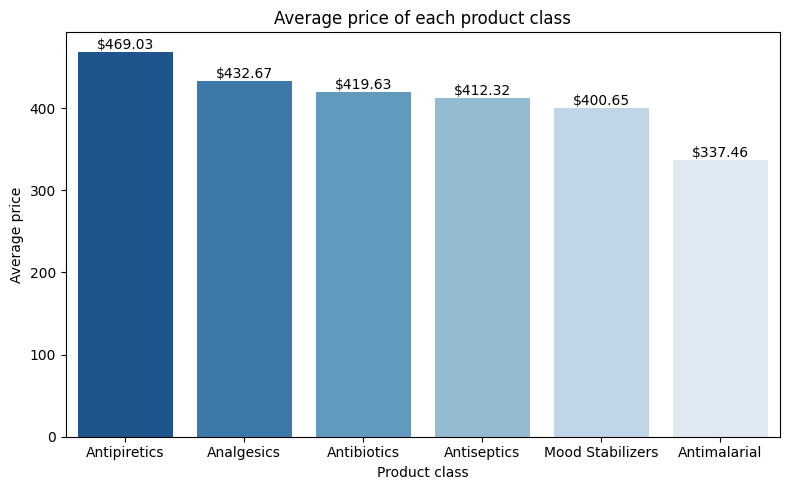

In [213]:
product_class_price = df.groupby('Product Class', as_index=False)['Price'].mean().sort_values(by='Price', ascending=False)

plt.figure(figsize = (8,5))
ax = sns.barplot(data = product_class_price, x='Product Class', y='Price', hue='Product Class', palette='Blues_r')

for i in ax.patches:
    ax.annotate(f'${i.get_height():,.2f}',
               (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')
                
plt.xlabel('Product class')
plt.ylabel('Average price')
plt.title('Average price of each product class')
plt.tight_layout()
plt.show()

### 3.2 Geographical Insights
### 3.2.1. Revenue share by country

Sales data was aggregated at the country level to identify which regions contributed the most to the overall revenue. This analysis helps to pinpoint high-performing markets.

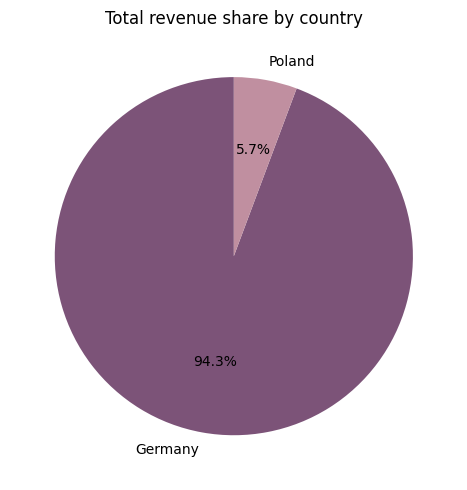

In [215]:
revenue_country = df.groupby('Country')['Sales'].sum().reset_index()

plt.figure(figsize = (7,5))
ax = plt.pie(x = revenue_country['Sales'], labels=revenue_country['Country'], autopct='%1.1f%%', startangle=90, colors=['#7C5378', '#C08FA0'])
                
plt.title('Total revenue share by country')
plt.tight_layout()
plt.show()

### 3.2.2 Top 10 cities with highest sales volume

An analysis of city-wise sales revealed that Butzbach recorded the highest overall sales volume. The next top-performing cities were:

- Baesweiler

- Cuxhaven

- Friedberg

- Atenburg

Other cities that featured in the top 10 included Emsdetten, Bottrop, Trier, Freising, and Castrop-Rauxel. These cities collectively represent high-demand regions and are vital contributors to overall business performance. 

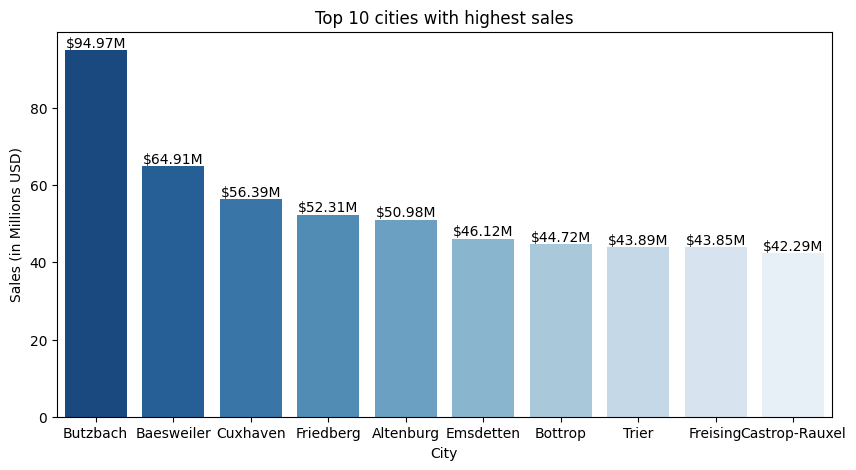

In [217]:
revenue_cities = df.groupby('City')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False).head(10)

plt.figure(figsize = (10,5))
ax = sns.barplot(data = revenue_cities, x='City', y='Sales', palette='Blues_r', hue='City')

for i in ax.patches:
    ax.annotate(f'${i.get_height() / 1_000_000:,.2f}M',
               (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')
    
def millions(x, pos):
    return f'{int(x/1_000_000):,}'
ax.yaxis.set_major_formatter(FuncFormatter(millions))
                
plt.xlabel('City')
plt.ylabel('Sales (in Millions USD)')
plt.title('Top 10 cities with highest sales')
plt.show()

### 3.2.3 Distribution channels that perform best in specific countries or cities

The sales data was analyzed across different distribution Channels and Sub-Channels to determine their impact. The analysis indicated minimal variation in average sales across these segments, suggesting that distribution type does not significantly influence sales volume.

However, the combination of Pharmacy as the Channel and Retail as the Sub-Channel emerged as the most consistent and high-performing duo, outperforming others in both reach and revenue generation.

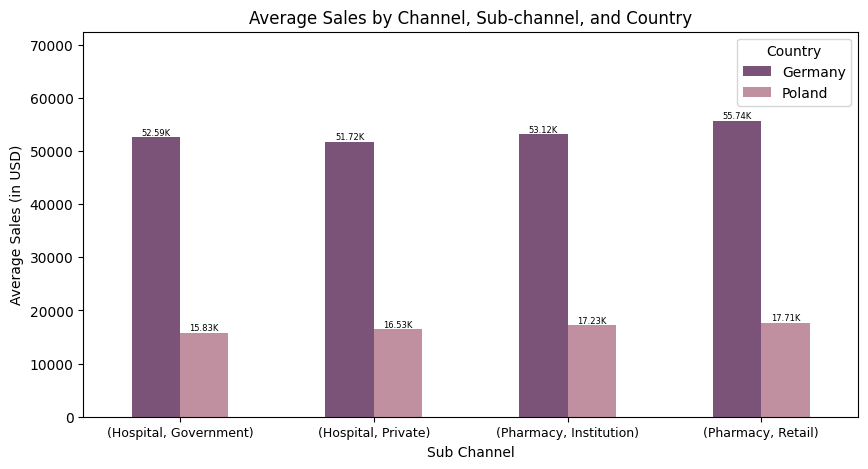

In [219]:
revenue_channel_country = df.groupby(['Channel','Sub-channel','Country'])['Sales'].mean().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 5))
gc = revenue_channel_country.plot(kind='bar', stacked=False, ax=ax, color=['#7C5378', '#C08FA0'])

for i in gc.patches:
    gc.annotate(f'{i.get_height()/1000:,.2f}K', 
               (i.get_x() + i.get_width()/2, i.get_height()), ha='center', va='bottom', fontsize=6)


ymax = revenue_channel_country.max().max()
plt.ylim(0, ymax * 1.3)

plt.title('Average Sales by Channel, Sub-channel, and Country')
plt.xlabel('Sub Channel')
plt.xticks(rotation=0, fontsize=9)
plt.ylabel('Average Sales (in USD)')
plt.show()

### 3.2.4 Underperforming regions where sales are consistently low?

To identify consistently underperforming regions, sales data was grouped by city and year, and total annual sales were calculated. The bottom 25 cities for each year were extracted, and cities appearing most frequently in these bottom rankings were flagged as persistent low performers. BiaÅ‚ogard stood out as the city with the lowest overall sales, appearing in the bottom 25 list for 3 out of 4 years. This suggests a long-term performance issue in the region that may require strategic review or intervention.

In [221]:
city_year_sales = df.groupby(['City', 'Year'])['Sales'].sum().unstack(fill_value=0)

bottom_n = 25
bottom_cities_per_year = {}

for year in city_year_sales.columns:
    bottom_cities = city_year_sales[year].nsmallest(bottom_n).index.tolist()
    bottom_cities_per_year[year] = bottom_cities

all_bottom_cities = []

for year in bottom_cities_per_year:
    cities = bottom_cities_per_year[year]
    for city in cities:
        all_bottom_cities.append(city)

city_counts = pd.Series(all_bottom_cities).value_counts()
bottom_counts_df = pd.DataFrame({'Count': city_counts})

bottom_cities_df = bottom_counts_df.join(city_year_sales)

bottom_cities_df['Total Sales'] = bottom_cities_df[city_year_sales.columns].sum(axis=1)

bottom_10_df = bottom_cities_df.sort_values(by=['Count', 'Total Sales'], ascending=[False, True]).head(10)

bottom_10_df


,Count,2017,2018,2019,2020,Total Sales
BiaÅ‚ogard,3,0.0,2047523.0,0.0,0.0,2047523.0
Brzesko,3,0.0,2079222.0,0.0,0.0,2079222.0
BiaÅ‚a Podlaska,3,0.0,2105639.0,0.0,0.0,2105639.0
BeÅ‚chatÃ³w,3,0.0,2243375.0,0.0,0.0,2243375.0
BieruÅ„ Stary,3,0.0,2262808.0,0.0,0.0,2262808.0
BytÃ³w,3,0.0,2324731.0,0.0,0.0,2324731.0
Bochnia,3,0.0,2715991.0,0.0,0.0,2715991.0
Brzeg,3,0.0,2735314.0,0.0,0.0,2735314.0
Bytom,3,0.0,2837300.0,0.0,0.0,2837300.0
Brzeszcze,3,0.0,2848546.0,0.0,0.0,2848546.0


### 3.3 Time-Based Trends
### 3.3.1  Sales trend over the months and years

The analysis of monthly and yearly sales trends revealed that the lowest sales were recorded in January 2019, while the peak sales for the year occurred in August 2019. 

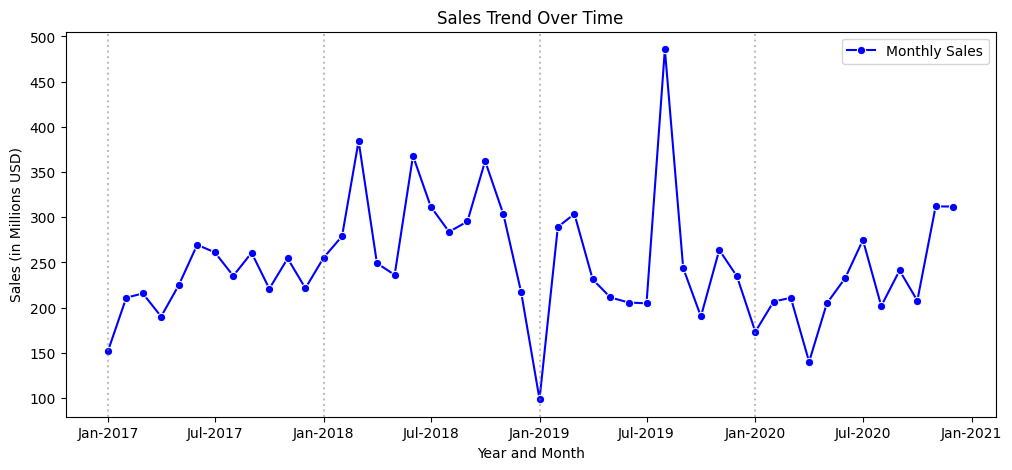

In [223]:
sales_date = df.groupby('Date')['Sales'].sum().reset_index()


plt.figure(figsize=(12, 5))
sns.lineplot(data=sales_date, x='Date', y='Sales', label='Monthly Sales', marker='o', color='Blue')

for year in sales_date['Date'].dt.year.unique():
    plt.axvline(pd.to_datetime(f'Jan-{year}'), color='gray', linestyle=':', alpha=0.5)

plt.xlabel('Year and Month')
plt.ylabel('Sales (in Millions USD)')
plt.title('Sales Trend Over Time')

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b-%Y'))
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions)) 
plt.show()


### 3.3.2 Month that consistently records the highest sales

A clustered bar plot comparing monthly sales across years indicated that November and May demonstrated the most consistent performance over time, though they did not necessarily record the highest average sales.

Months with the highest average sales across years were March, June, July, August, and November, indicating a tendency for stronger sales during the second and third quarters.

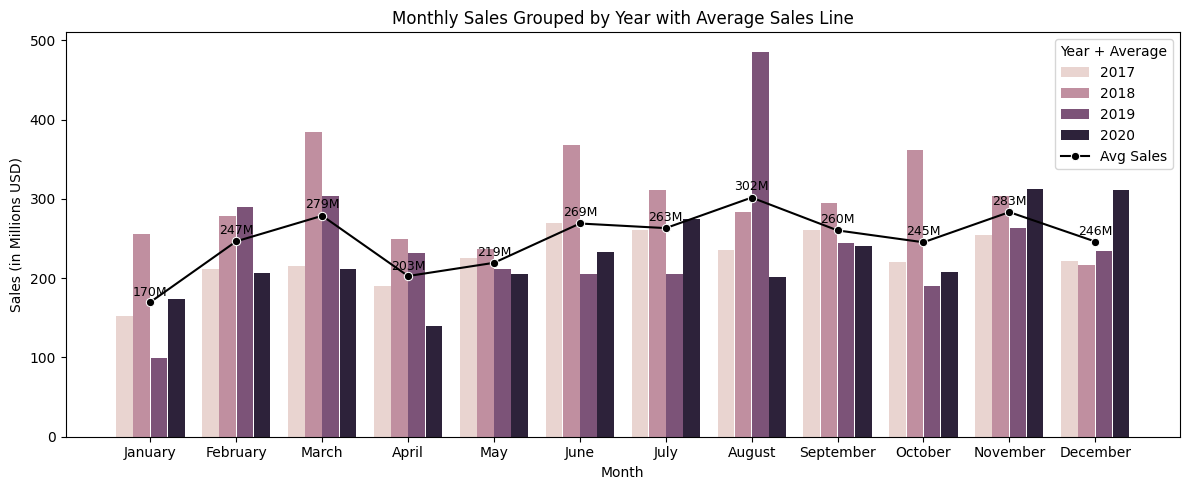

In [225]:
monthly_sales = df.groupby(['Month', 'Year'])['Sales'].sum().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)

monthly_avg = monthly_sales.groupby('Month', observed=False)['Sales'].mean().reindex(month_order).reset_index()

plt.figure(figsize=(12, 5))
ax = sns.barplot(data=monthly_sales, x='Month', y='Sales', hue='Year', gap=0.03)
sns.lineplot(data=monthly_avg, x='Month', y='Sales', color='black', marker='o', label='Avg Sales', ax=ax)

for i, row in monthly_avg.iterrows():
    ax.text(i, row['Sales'] + 0.02 * row['Sales'], f'{row["Sales"]/1000000:,.0f}M', 
            ha='center', va='bottom', fontsize=9, color='black')
    
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions)) 
plt.title('Monthly Sales Grouped by Year with Average Sales Line')
plt.xlabel('Month')
plt.ylabel('Sales (in Millions USD)')
plt.legend(title='Year + Average')
plt.tight_layout()
plt.show()

### 3.3.4 Seasonal trends in sales

Sales trends analyzed by quarter showed that Quarter 3 (Q3) consistently recorded the highest sales volume in most years. The only exception was 2020, where Quarter 4 (Q4) saw the highest sales.

Quarter 2 (Q2) generally had the lowest sales, except for 2017, when Quarter 1 (Q1) had the weakest performance. These seasonal patterns could be tied to climate-driven demand, disease cycles, or strategic sales campaigns.

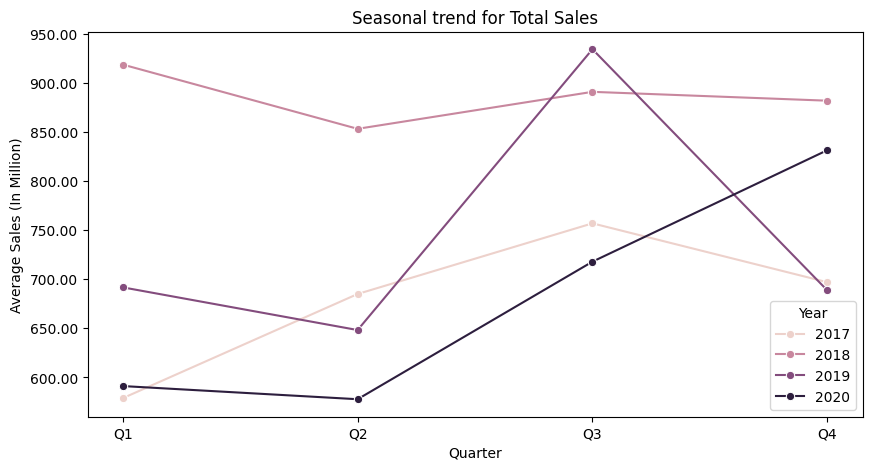

In [227]:
df1 = df.copy()
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year

df1['Quarter'] = pd.cut(df1['Month'], bins=[0, 3, 6, 9, 12], labels=['Q1', 'Q2', 'Q3', 'Q4'], right=True)

Quarterly_sales = df1.groupby(['Year', 'Quarter'], observed=False)['Sales'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=Quarterly_sales, x='Quarter', y='Sales', hue='Year', marker='o')

plt.xlabel('Quarter')
plt.ylabel('Average Sales (In Million)')
plt.title(f'Seasonal trend for Total Sales')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x/1000000:,.2f}'))
plt.show()


### 3.3.5 Seasonal trends in sales for specific products

A custom function was used to analyze seasonal trends for individual products. For instance, Choriotrisin consistently showed a peak in sales during Quarter 3, with a sharp rise indicating a seasonal spike in demand—potentially linked to health issues more prevalent during this time of year.
This method can be applied to other products as well to identify seasonal dependencies and forecast demand more accurately.

Enter Product Name: Choriotrisin


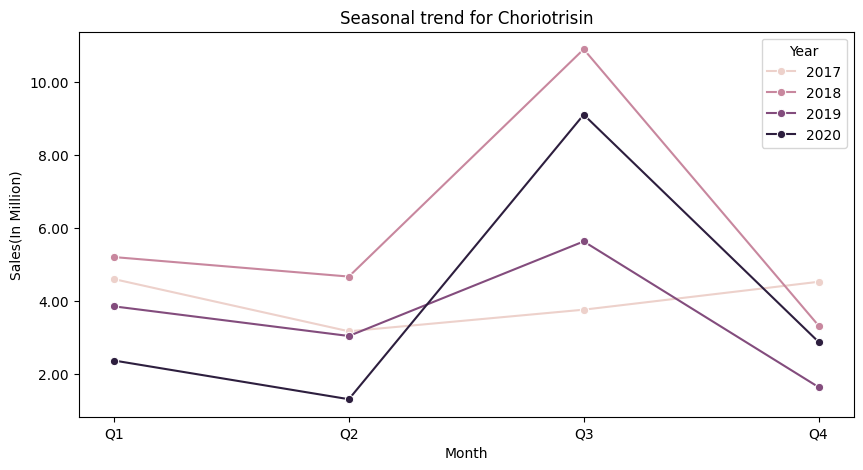

In [229]:
def seasona_trend(product):

    product_data = df1[df1['Product Name']== product].copy()

    Quarterly_sales = product_data.groupby(['Year', 'Quarter'], observed=False)['Sales'].sum().reset_index()

    plt.figure(figsize=(10, 5))
    sns.lineplot(data=Quarterly_sales, x='Quarter', y='Sales', hue='Year', marker='o')

    plt.xlabel('Month')
    plt.ylabel('Sales(In Million)')
    plt.title(f'Seasonal trend for {product}')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x/1000000:,.2f}'))
    plt.show()

product = input('Enter Product Name:')
seasona_trend(product)

### 3.3.6 Major Product or Sales Shift in a Specific Year
A similar function was employed to observe year-wise trends for individual products. For example, Choriotrisin saw its highest sales in 2018, indicating a potential product surge, campaign success, or increased market demand during that year.
This approach helps identify significant year-over-year changes in product performance and can guide strategic planning.

Enter Product Name: Choriotrisin


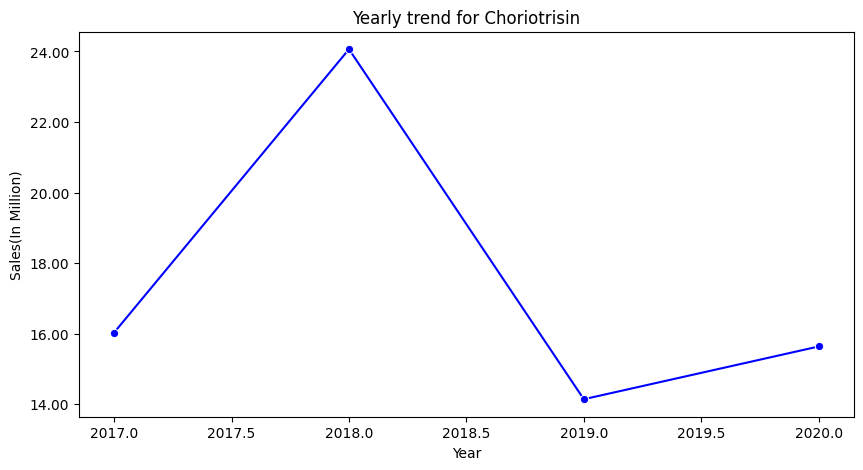

In [231]:
def yearly_trend(product_year):

    product_data = df[df['Product Name']== product].copy()

    Yearly_sales = product_data.groupby(['Product Name', 'Year'], observed=False)['Sales'].sum().reset_index()
    
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=Yearly_sales, x='Year', y='Sales', marker='o', color='Blue')

    plt.xlabel('Year')
    plt.ylabel('Sales(In Million)')
    plt.title(f'Yearly trend for {product_year}')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x/1000000:,.2f}'))
    plt.show()

product_year = input('Enter Product Name:')
yearly_trend(product_year)

### 3.3.7 Sub-channels growth over the years

A comparative analysis of all Channel and Sub-Channel combinations over the years showed a similar growth pattern across the board. All categories recorded their best performance in 2018, suggesting a peak business year irrespective of distribution method. This uniform trend point that Channel and Sub-channel do not significnatly affect the sales recorded.

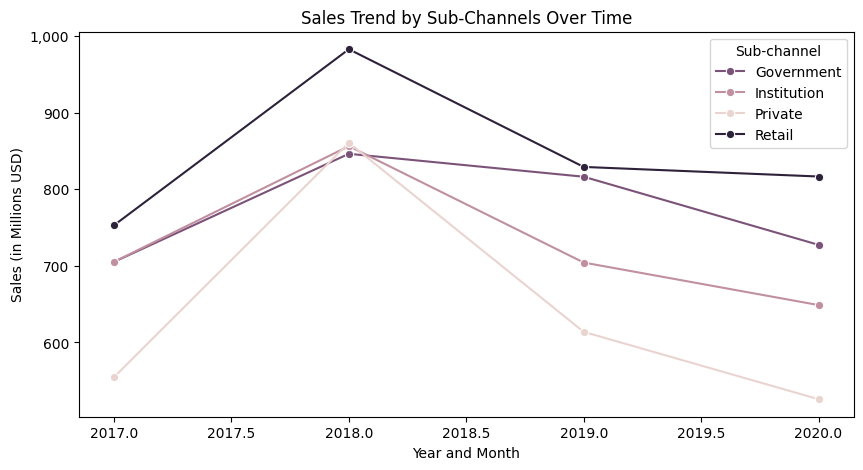

In [233]:
subchannel_year_sale = df.groupby(['Sub-channel','Year'])['Sales'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=subchannel_year_sale, x='Year', y='Sales', hue='Sub-channel', marker='o', palette=['#7C5378', '#C08FA0', '#E9D4D0', '#2D223A'])

plt.xlabel('Year and Month')
plt.ylabel('Sales (in Millions USD)')
plt.title('Sales Trend by Sub-Channels Over Time')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions)) 
plt.show()

### 3.4 Product-Level Analysis
### 3.4.1 Most popular product classes by quantity sold?

Analgesics emerged as the most popular class of products sold on average, followed by Antiseptics and Mood Stabilizers. However, annual variations were noted—for instance, in 2020, Antiseptics recorded the highest sales quantity. On the other end of the spectrum, Antipyretics consistently had the lowest total quantity sold.

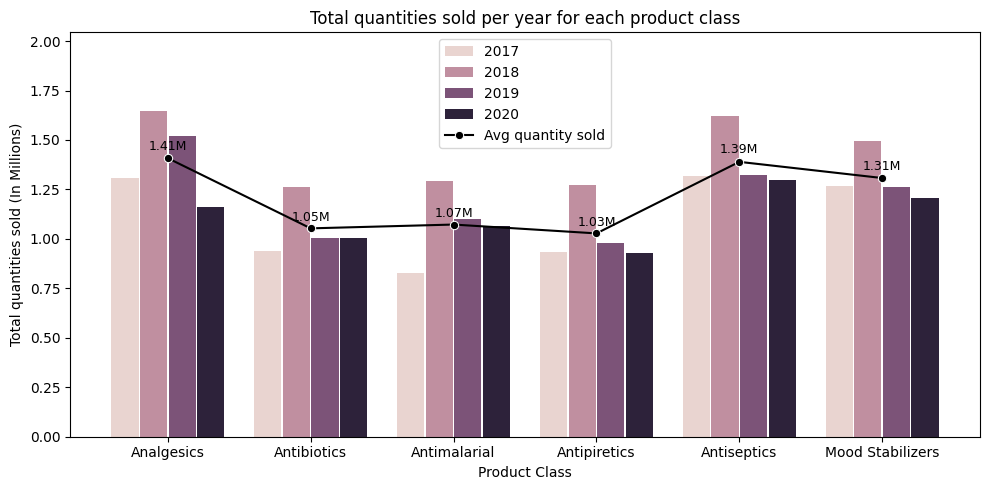

In [235]:
product_class = df.groupby(['Product Class', 'Year'])['Quantity'].sum().reset_index()

product_class_avg = product_class.groupby('Product Class')['Quantity'].mean().reset_index()

plt.figure(figsize=(10,5))
mc = sns.barplot(data=product_class, x='Product Class', y='Quantity', hue='Year', gap=0.05)
sns.lineplot(data=product_class_avg, x='Product Class', y='Quantity', color='black', marker='o', label='Avg quantity sold')

for i, row in product_class_avg.iterrows():
    mc.text(i, row['Quantity'] + 0.02 * row['Quantity'], f'{row['Quantity']/1000000:,.2f}M', 
            ha='center', va='bottom', fontsize=9, color='black')
    
plt.title('Total quantities sold per year for each product class')
plt.ylim(0, product_class['Quantity'].max() + 400000 )
plt.xlabel('Product Class')
plt.ylabel('Total quantities sold (In Millions)')
plt.gca().yaxis.set_major_formatter(FuncFormatter (lambda x, pos: f'{x/1000000:,.2f}'))
plt.tight_layout() 
plt.show()

### 3.4.2 Products with high quantities sold but low sales revenue (or vice versa)

A scatter plot comparing total quantities sold and total sales revenue revealed a direct proportional relationship. No products exhibited a pattern of high sales revenue but low quantities sold, or vice versa. This suggests that sales revenue is largely driven by the quantity of product sold.

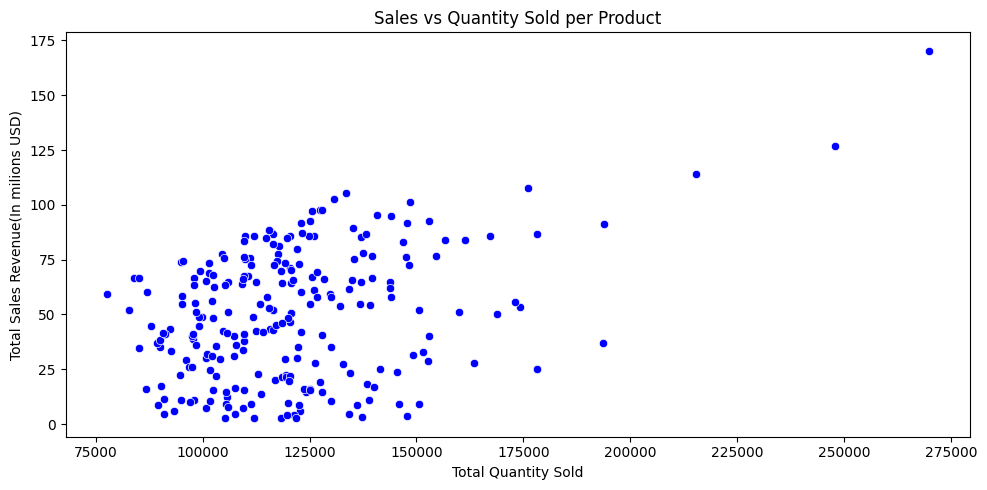

In [237]:
product_perf = df.groupby('Product Name')[['Quantity', 'Sales']].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=product_perf, x='Quantity', y='Sales', color='Blue')

plt.title('Sales vs Quantity Sold per Product')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Total Sales Revenue(In milions USD)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.tight_layout()
plt.show()

### 3.4.3 No of unique products being sold under each sub-channel

Analysis showed that all products are distributed across all Sub-Channels, indicating a comprehensive and uniform product availability strategy across sales channels.

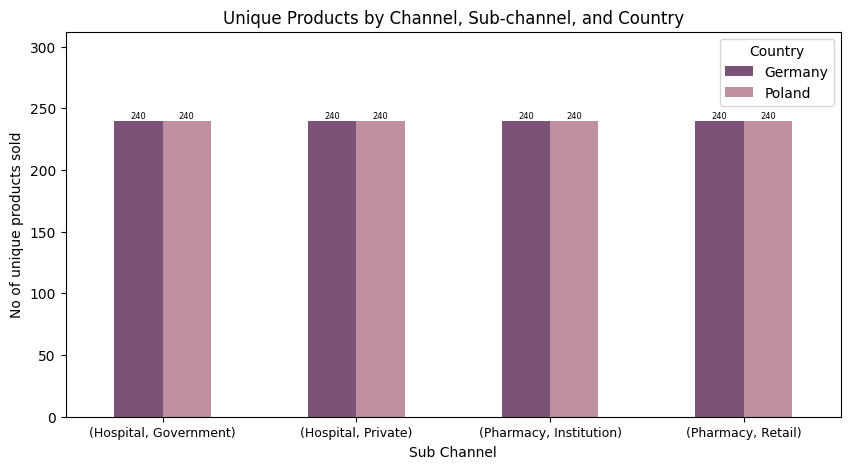

In [239]:
unique_product_channel = df.groupby(['Channel','Sub-channel','Country'])['Product Name'].nunique().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 5))
gc = unique_product_channel.plot(kind='bar', stacked=False, ax=ax, color=['#7C5378', '#C08FA0'])

for i in gc.patches:
    gc.annotate(f'{i.get_height()}', 
               (i.get_x() + i.get_width()/2, i.get_height()), ha='center', va='bottom', fontsize=6)

ymax = unique_product_channel.max().max()
plt.ylim(0, ymax * 1.3)
plt.title('Unique Products by Channel, Sub-channel, and Country')
plt.xlabel('Sub Channel')
plt.xticks(rotation=0, fontsize=9)
plt.ylabel('No of unique products sold')
plt.show()

### 3.4.4 Quantities of Product Classes sold in Hospitals vs Pharmacies

In general, Pharmacies purchase higher quantities of products compared to Hospitals. The most pronounced gap was observed for Antipyretics, while Mood Stabilizers were sold in almost equal volumes to both hospitals and pharmacies, indicating their universal demand.

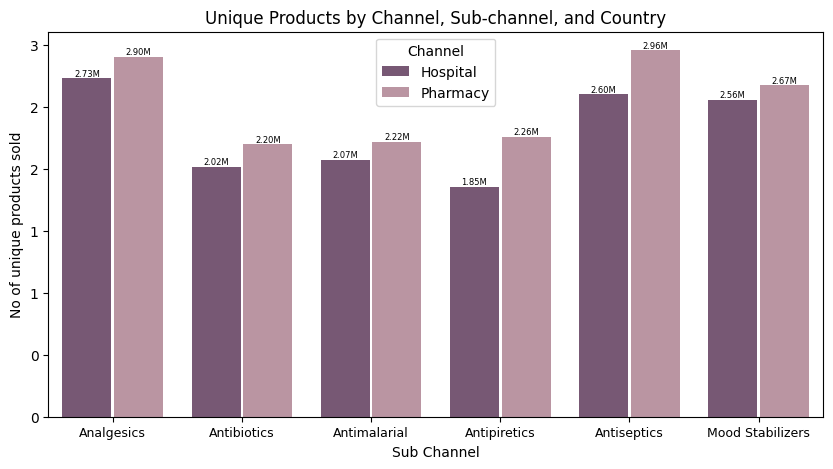

In [241]:
product_class_channel = df.groupby(['Channel','Product Class'])['Quantity'].sum().reset_index()

plt.figure(figsize=(10,5))
gc = sns.barplot(data=product_class_channel, x='Product Class', y='Quantity', hue='Channel', gap=0.05, palette=['#7C5378','#C08FA0'])

for i in gc.patches:
    if i.get_height()>0:
        gc.annotate(f'{i.get_height() / 1000000:,.2f}M', 
                   (i.get_x() + i.get_width()/2, i.get_height()), ha='center', va='bottom', fontsize=6)


plt.title('Unique Products by Channel, Sub-channel, and Country')
plt.xlabel('Sub Channel')
plt.xticks(rotation=0, fontsize=9)
gc.yaxis.set_major_formatter(FuncFormatter(millions))
plt.ylabel('No of unique products sold')
plt.show()

### 3.4.5 Product classes that bring high revenue but low order quantity—i.e., premium products

A scatter plot of product class quantities vs total sales revealed no premium product classes—i.e., none recorded high revenue at low quantities sold. Product classes like Antipyretics, Antibiotics, and Antimalarials had both low quantity sold and low sales, while Mood Stabilizers, Antiseptics, and Analgesics generated high revenue driven by high volume.

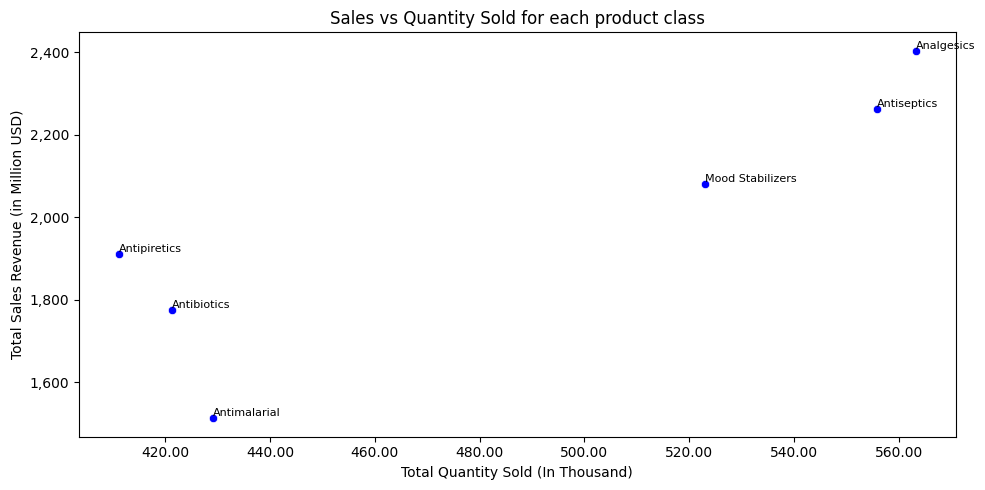

In [243]:
product_perf_class = df.groupby('Product Class')[['Quantity', 'Sales']].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=product_perf_class, x='Quantity', y='Sales', color='Blue')

for i in range(product_perf_class.shape[0]):
    plt.text(
        product_perf_class['Quantity'][i],
        product_perf_class['Sales'][i],
        product_perf_class['Product Class'][i],
        fontsize=8,
        ha='left',
        va='bottom'
    )

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x/10000:.2f}'))
plt.title('Sales vs Quantity Sold for each product class')
plt.xlabel('Total Quantity Sold (In Thousand)')
plt.ylabel('Total Sales Revenue (in Million USD)')
plt.tight_layout()
plt.show()

### 3.4.6 Corelation of price changes with changes in quantity sold

Analysis confirmed that product prices remained constant over the four-year period. When comparing static price points to sales volumes via a scatter plot, no significant correlation was observed between price and quantity sold. This suggests that factors other than price—such as demand or seasonality—drive product sales.

In [245]:
product_year = df.groupby(['Product Name', 'Year'])[['Price', 'Quantity']].mean().reset_index()

product_year['Price Change'] = product_year.groupby('Product Name')['Price'].pct_change()

price_change_product = product_year[(product_year['Price Change'].notna()) & (product_year['Price Change'] != 0)]

price_change_product

,Product Name,Year,Price,Quantity,Price Change


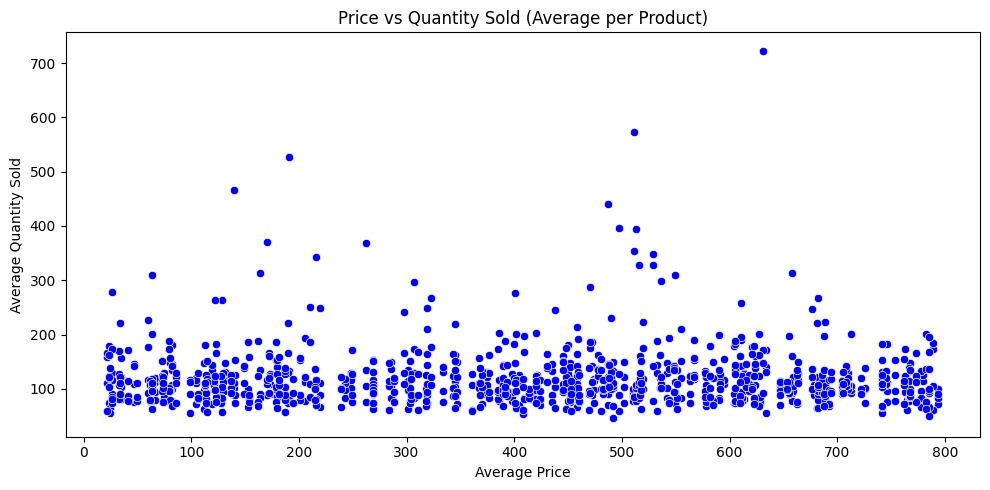

In [246]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=product_year, x='Price', y='Quantity', color='Blue')
plt.title('Price vs Quantity Sold (Average per Product)')
plt.xlabel('Average Price')
plt.ylabel('Average Quantity Sold')
plt.tight_layout()
plt.show()

### 3.5 Sales Team Performance
### 3.5.1 Managers with top-performing sales teams

Among all teams, Team Delta, managed by Brittany Bold, consistently generated the highest total sales, making it the top-performing sales team across the analysis period.

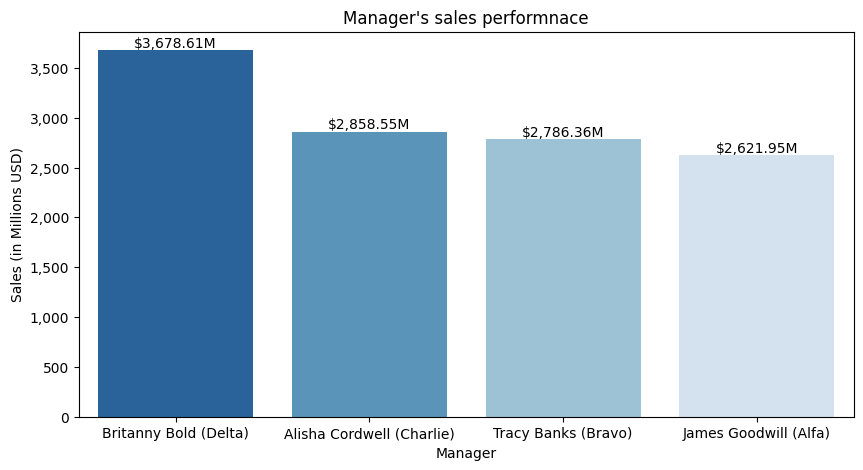

In [248]:
manager_sales = df.groupby(['Manager', 'Sales Team'])['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

manager_sales['Label'] = manager_sales['Manager'] + ' (' + manager_sales['Sales Team'] + ')'

plt.figure(figsize = (10,5))
ax = sns.barplot(data = manager_sales, x='Label', y='Sales', palette='Blues_r', hue='Label')

for i in ax.patches:
    ax.annotate(f'${i.get_height() / 1_000_000:,.2f}M',
               (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')
    
def millions(x, pos):
    return f'{int(x/1_000_000):,}'
ax.yaxis.set_major_formatter(FuncFormatter(millions))
                
plt.xlabel('Manager')
plt.ylabel('Sales (in Millions USD)')
plt.title("Manager's sales performnace")
plt.show()


### 3.5.2 No of Sales rep under each manager

Brittany Bold led the largest team, with 4 Sales Representatives, while all other managers supervised teams of 3 Representatives each.

In [250]:
manager_Rep = df.groupby(['Manager'])['Name of Sales Rep'].nunique().reset_index().sort_values(
    by='Name of Sales Rep', ascending=False).rename(
    columns={'Name of Sales Rep': 'No of Sales Rep'})
manager_Rep 

,Manager,No of Sales Rep
1,Britanny Bold,4
0,Alisha Cordwell,3
2,James Goodwill,3
3,Tracy Banks,3


### 3.5.3 Sales Rep with the highest sales revenue

Jimmy Grey was identified as the top-performing Sales Representative, having generated the highest total sales revenue among all individuals.

In [252]:
revenue_rep = df.groupby('Name of Sales Rep')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
highest_revenue_rep = revenue_rep.iloc[0]['Name of Sales Rep']
highest_revenue_rep_sales = revenue_rep.iloc[0]['Sales']
print(f'Rep with highest sales rep:  {highest_revenue_rep} (${highest_revenue_rep_sales:,.2f})')

Rep with highest sales rep:  Jimmy Grey ($994,943,686.94)


### 3.5.4 Difference in sales performance across different channels or sub-channels managed by the same sales team

Sales trends across different Channels and Sub-Channels were consistent for all teams. Across the board, Pharmacy - Retail recorded the highest sales, while Private Hospitals had the lowest sales. All teams operated across every Channel and Sub-Channel combination, indicating uniform responsibility distribution.

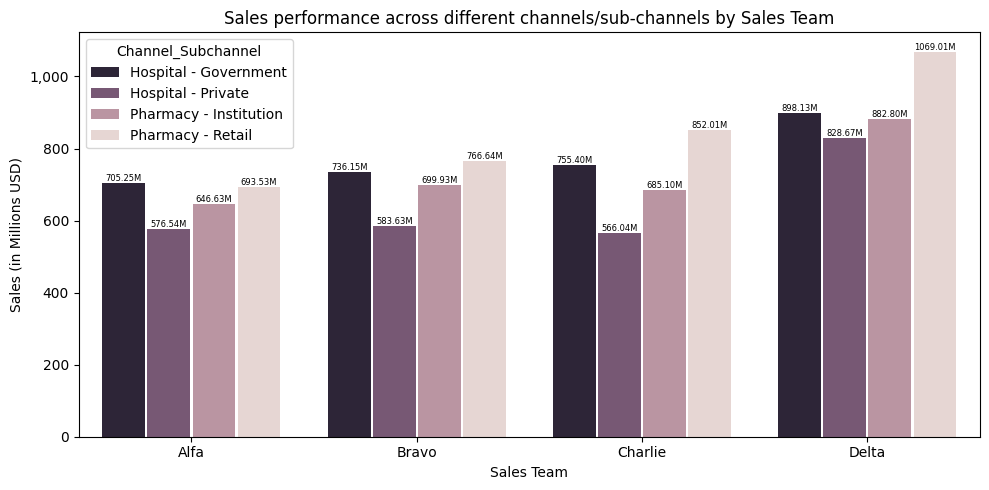

In [254]:
df1['Channel_Subchannel'] = df1['Channel'] + ' - ' + df1['Sub-channel']

sales_team_channel = df1.groupby(['Sales Team', 'Channel_Subchannel'])['Sales'].sum().reset_index()

plt.figure(figsize=(10, 5))
gc = sns.barplot(data=sales_team_channel, x='Sales Team', y='Sales', hue='Channel_Subchannel', gap=0.05, palette=['#2D223A','#7C5378', '#C08FA0', '#E9D4D0'])

for bar in gc.patches:
    if bar.get_height() >0:
        gc.annotate(f'{bar.get_height() / 1_000_000:.2f}M', 
                    (bar.get_x() + bar.get_width()/2, bar.get_height()), 
                    ha='center', va='bottom', fontsize=6)

plt.title('Sales performance across different channels/sub-channels by Sales Team')
plt.xlabel('Sales Team')
plt.xticks(rotation=0)
plt.ylabel('Sales (in Millions USD)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.tight_layout()
plt.show()


### 3.5.5 Team wise Sales over the years

Team Delta outperformed all others from 2017 to 2019, with sales consistently exceeding that of other teams. However, their performance declined significantly in 2020.

The other three teams showed similar performance levels, with Team Charlie ranking second in 2019 and recording the highest quarterly sales in Q4 2020, surpassing even Delta.

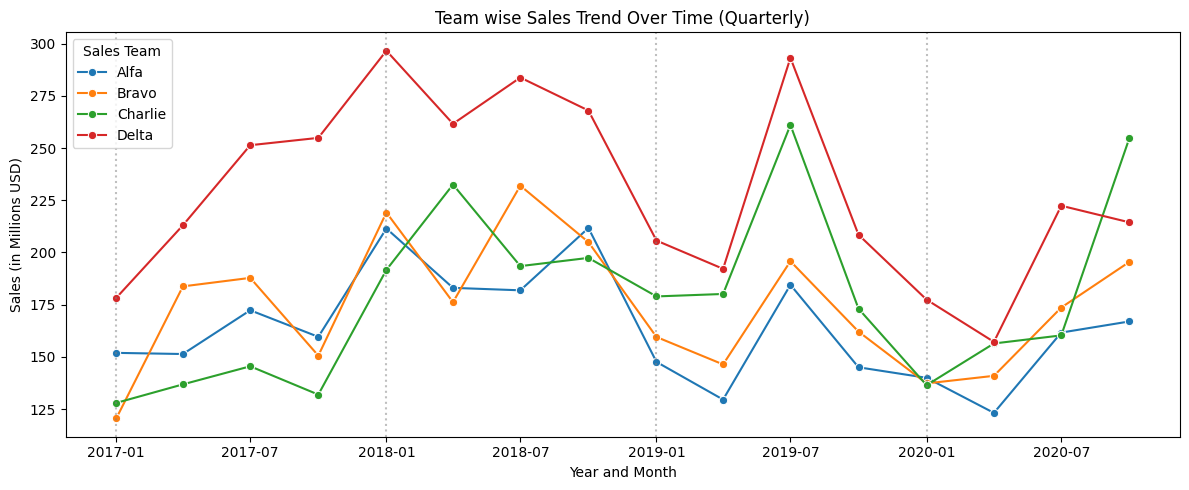

In [256]:
df1['Year-Quarter'] = df1['Date'].dt.to_period('Q')
df1['Year-Quarter-Date'] = df1['Year-Quarter'].dt.start_time

df_grouped = df1.groupby(['Year-Quarter-Date', 'Sales Team'])['Sales'].sum().reset_index()

plt.figure(figsize=(12, 5))

sns.lineplot(data=df_grouped, x='Year-Quarter-Date', y='Sales', marker='o', hue='Sales Team', palette='tab10')

for year in df_grouped['Year-Quarter-Date'].dt.year.unique():
    plt.axvline(pd.to_datetime(f'{year}-01-01'), color='gray', linestyle=':', alpha=0.5)

plt.xlabel('Year and Month')
plt.ylabel('Sales (in Millions USD)')
plt.title('Team wise Sales Trend Over Time (Quarterly)')

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

plt.tight_layout()
plt.show()


### 3.5.6 Relationship between Quantity sold and Sales generated by Team

A dual-axis plot comparing total quantity sold and sales revenue for each team showed a direct, proportional relationship. While all teams followed this pattern, Team Delta led both in sales revenue and total quantities sold, confirming their top-tier performance.

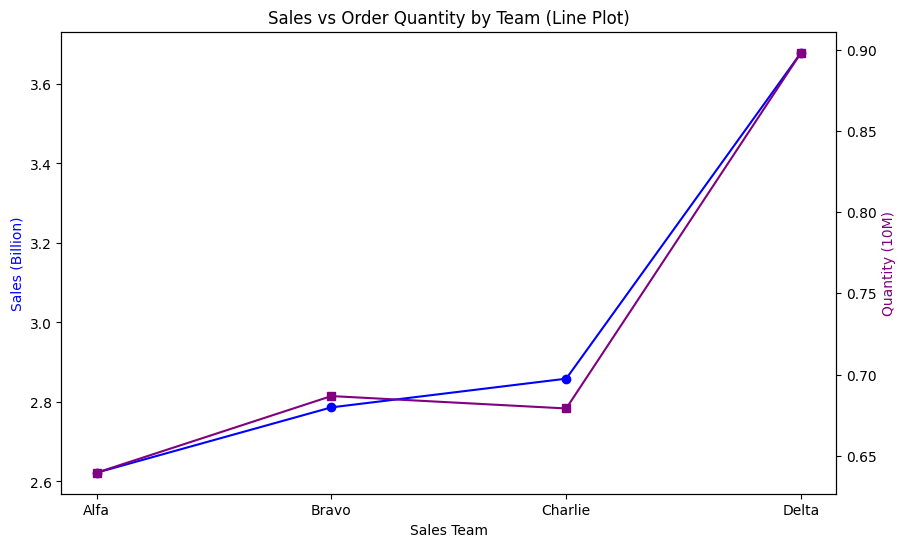

In [258]:
df_grouped = df.groupby('Sales Team').agg({'Sales': 'sum', 'Quantity': 'sum'}).reset_index()

df_grouped['Sales (Billion)'] = df_grouped['Sales'] / 1e9  # from thousand millions to billions
df_grouped['Quantity (10M)'] = df_grouped['Quantity'] / 1e7

fig, ax1 = plt.subplots(figsize=(10,6))

ax2 = ax1.twinx()
ax1.plot(df_grouped['Sales Team'], df_grouped['Sales (Billion)'], color='blue', marker='o', label='Sales')
ax2.plot(df_grouped['Sales Team'], df_grouped['Quantity (10M)'], color='Purple', marker='s', label='Quantity')

ax1.set_ylabel('Sales (Billion)', color='blue')
ax2.set_ylabel('Quantity (10M)', color='Purple')
ax1.set_xlabel('Sales Team')
plt.title("Sales vs Order Quantity by Team (Line Plot)")
plt.show()



### 3.5.7 Summary of City, Customers, products and Products class dealth by each Sales team

All teams operated in all cities, engaged with all customer types, and were responsible for selling all products and product classes, indicating a holistic, non-segmented team structure.

In [260]:
summary = df.groupby('Sales Team').agg({
    'City': 'nunique',
    'Customer Name': 'nunique',
    'Product Name': 'nunique',
    'Product Class': 'nunique'}).reset_index()
summary

,Sales Team,City,Customer Name,Product Name,Product Class
0,Alfa,749,751,240,6
1,Bravo,749,751,240,6
2,Charlie,749,751,240,6
3,Delta,749,751,240,6


### 3.6 Customer Insights
### 3.6.1 Top 10 customers by highest sales

Mraz-Kutch Pharma Plc was the top customer in terms of total sales, with revenue nearing $95 million. A bar chart further highlights the other customers who rank in the top 10 by revenue.

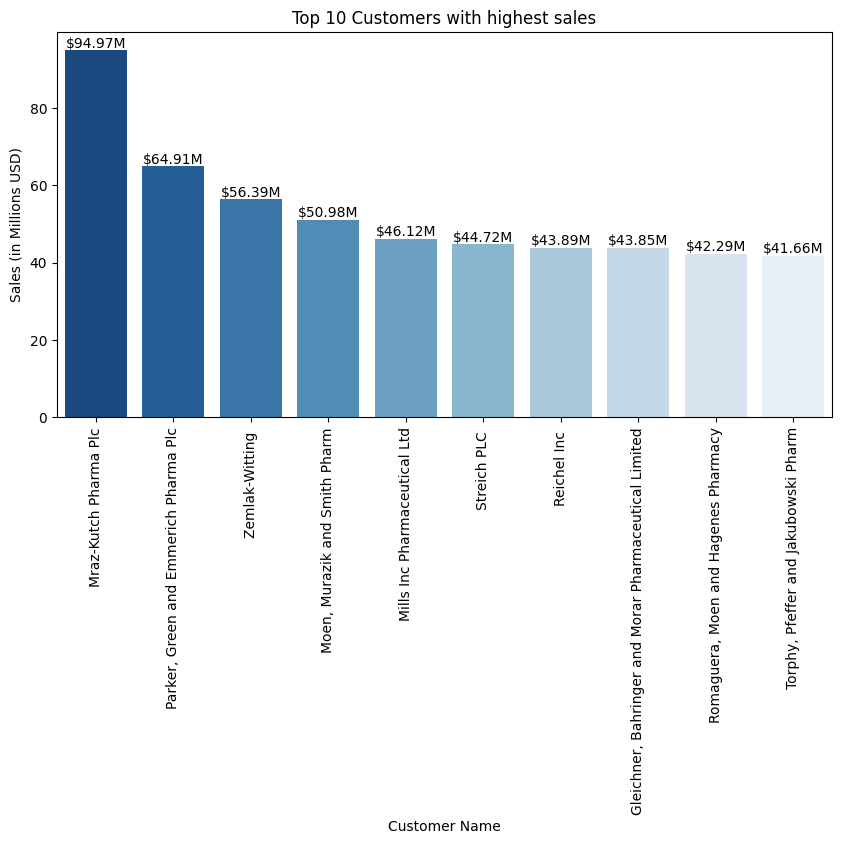

In [262]:
revenue_cities = df.groupby('Customer Name')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False).head(10)

plt.figure(figsize = (10,5))
ax = sns.barplot(data = revenue_cities, x='Customer Name', y='Sales', palette='Blues_r', hue='Customer Name')

for i in ax.patches:
    ax.annotate(f'${i.get_height() / 1_000_000:,.2f}M',
               (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')
    
def millions(x, pos):
    return f'{int(x/1_000_000):,}'
ax.yaxis.set_major_formatter(FuncFormatter(millions))
                
plt.xlabel('Customer Name')
plt.ylabel('Sales (in Millions USD)')
plt.xticks(rotation=90)
plt.title('Top 10 Customers with highest sales')
plt.show()

### 3.6.2 Top 10 customers by highest quanity ordered

Mraz-Kutch Pharma Plc also placed first in terms of total quantity ordered, purchasing nearly 176,000 units. Other top customers are shown in the accompanying bar graph.

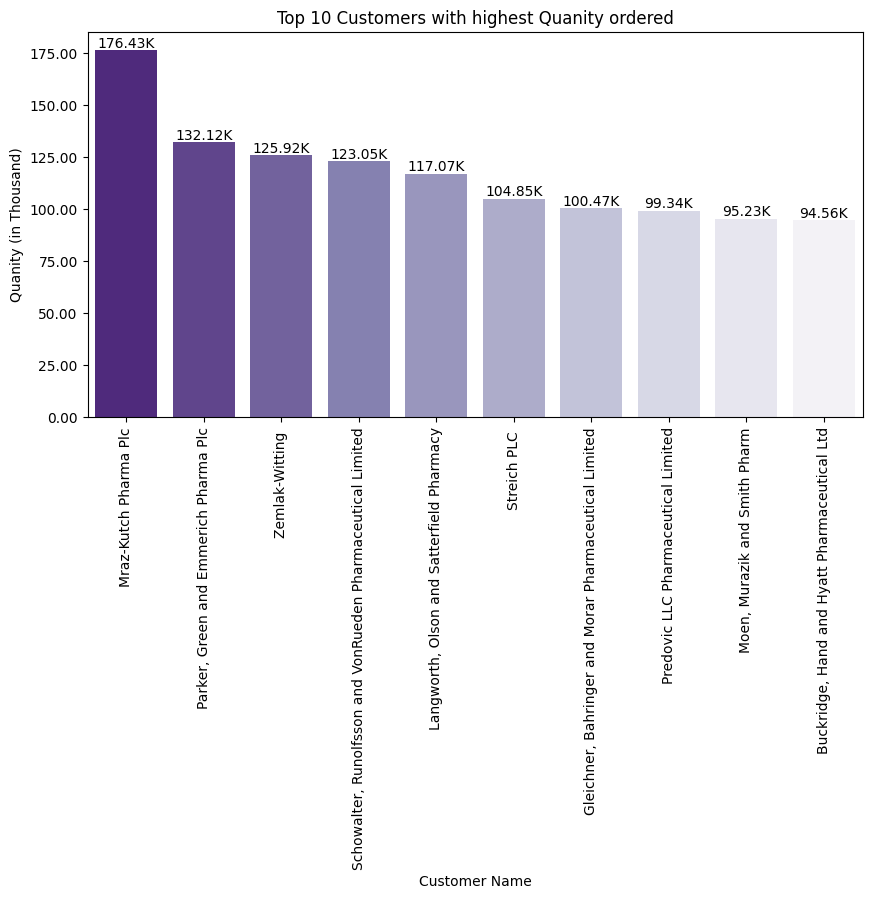

In [264]:
revenue_cities = df.groupby('Customer Name')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(10)

plt.figure(figsize = (10,5))
ax = sns.barplot(data = revenue_cities, x='Customer Name', y='Quantity', palette='Purples_r', hue='Customer Name')

for i in ax.patches:
    ax.annotate(f'{i.get_height() / 1000:,.2f}K',
               (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')
    
def millions(x, pos):
    return f'{int(x/1_000_000):,}'
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x/1000:,.2f}'))
                
plt.xlabel('Customer Name')
plt.ylabel('Quanity (in Thousand)')
plt.xticks(rotation=90)
plt.title('Top 10 Customers with highest Quanity ordered')
plt.show()

### 3.6.3 No of unique products purchased on average by each customer

On average, each customer purchased around 176 different products out of a total 240 products available, demonstrating a broad and diversified product preference.

In [266]:
customer_product = df.groupby('Customer Name').agg({
    'Product Name': 'nunique'}).reset_index()
avg_unique_products_per_customer = customer_product['Product Name'].mean()
print(f"Average number of unique products per customer: {avg_unique_products_per_customer:.2f}")

Average number of unique products per customer: 176.60


### 3.6.4 Which distributors purchased the most diverse range of products or classes

Welch-Orn Pharmacy stood out as the distributor that purchased the most diverse product range, with over 208 unique products procured out of the total 240—highlighting their extensive portfolio coverage.

In [268]:
customer_product.sort_values(by='Product Name', ascending=False).head(10).rename(columns={'Product Name': 'Number of Products'})

,Customer Name,Number of Products
710,Welch-Orn Pharmacy,208
415,Mann-Waelchi Pharma Plc,204
87,Buckridge-Davis Pharmaceutical Limited,204
187,"Fritsch, Hodkiewicz and Sipes Pharma Plc",204
186,Fritsch LLC Pharmaceutical Ltd,204
499,Paucek PLC,203
492,Parisian Ltd Pharma Plc,202
551,Rogahn-Klein Pharma Plc,202
636,Spencer-Jerde Pharmaceutical Limited,202
541,"Reinger, Kihn and Goyette Pharma Plc",202


## 4. Conclusion
This comprehensive sales and product-level analysis, spanning four years of transaction data, has yielded several strategic insights that can significantly support data-driven decision-making and performance optimization across the organization.

**Key Findings:**
- Consistent Growth with a Peak in 2018: Sales and quantities across all channels and teams saw their highest performance in 2018, indicating favorable market conditions and possibly optimized sales operations during that period.

- Seasonal and Monthly Trends: Sales consistently peaked during Q3, especially in August and November, with 2020 being an exception, where Q4 recorded the highest sales. These seasonal patterns reflect underlying market behaviors, including disease prevalence and procurement cycles.

**Product Performance:**

- Analgesics, Antiseptics, and Mood Stabilizers emerged as the most popular product classes.

- There was a direct correlation between quantity sold and total sales, indicating a lack of “premium” low-volume, high-margin products.

- Price changes had no observable effect on product demand, likely due to price stability over the period.

**Sales Team Performance:**

- Team Delta, under Brittany Bold, was the top performer overall but showed a notable decline in 2020.

- Jimmy Grey led all sales representatives in revenue generation.

- Sales trends were consistent across all channels for all teams, with Pharmacy Retail emerging as the dominant revenue generator.

**Customer Behavior:**

- Mraz-Kutch Pharma Plc stood out as the top customer by both revenue and volume.

- On average, customers purchased about 73% of available products, with Welch-Orn Pharmacy having the most diverse procurement pattern.

**Business Implications:**
1. Resource Allocation: Knowing which quarters and months perform best enables better inventory management and resource planning during peak seasons.

2. Customer Segmentation: Identifying top customers and their purchasing behavior allows for targeted relationship management and personalized service strategies.

3. Product Portfolio Management: Since most revenue is driven by high-volume products, efforts should focus on sustaining demand while also exploring potential for introducing high-margin premium products.

4. Sales Force Optimization: Understanding the strengths and gaps of each sales team and representative can inform targeted training and performance management.

**Recommended Future Actions:**
- Deep-Dive into Underperforming Periods and Teams: Investigate the 2020 performance dip of Team Delta and explore external or internal factors that may have influenced this.

- Product Innovation Strategy: Explore the development of premium product lines that can generate higher margins per unit.

- Customer Loyalty Programs: Create retention strategies for top customers and incentivize long-tail customers to increase product diversity in their orders.

- Advanced Forecasting Models: Implement predictive analytics using time-series models to better anticipate sales dips and surges based on seasonal and macroeconomic indicators.

- Expand Sub-Channel-Specific Strategies: While sub-channels showed similar trends, tailored strategies could uncover untapped potential in lesser-performing areas like Private Hospitals.